In [132]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [133]:
# Load data
data = pd.read_csv('Dataset/cic-ids_dataset.csv')


In [134]:
# Encode labels (convert attack names to integers)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

In [135]:
# Separate features and labels
X = data.drop('Label', axis=1)
y = data['Label']

In [136]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [137]:
# Handle infinite values and large values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

In [138]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

start_time = time.time()
rf_model.fit(X_train, y_train)

training_time_rf = time.time() - start_time

In [139]:
# Predict
y_pred_rf = rf_model.predict(X_test)

In [140]:
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [141]:
# Evaluate
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Results:
Accuracy: 0.9799141630901288
Classification Report:
                           precision    recall  f1-score   support

                  BENIGN       0.99      0.99      0.99      2854
                     Bot       0.93      0.94      0.93       118
                    DDoS       1.00      1.00      1.00       392
           DoS GoldenEye       0.99      1.00      0.99       309
                DoS Hulk       1.00      1.00      1.00       693
        DoS Slowhttptest       0.98      0.99      0.99       165
           DoS slowloris       1.00      0.98      0.99       174
             FTP-Patator       1.00      1.00      1.00       238
              Heartbleed       1.00      1.00      1.00         3
            Infiltration       1.00      0.82      0.90        11
                PortScan       0.99      1.00      1.00       490
             SSH-Patator       1.00      0.98      0.99       177
  Web Attack Brute Force       0.71      0.77      0.74       136

In [142]:
print("\nSVM:")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"Training Time (s): {training_time_rf:.2f}")


SVM:
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Training Time (s): 2.17


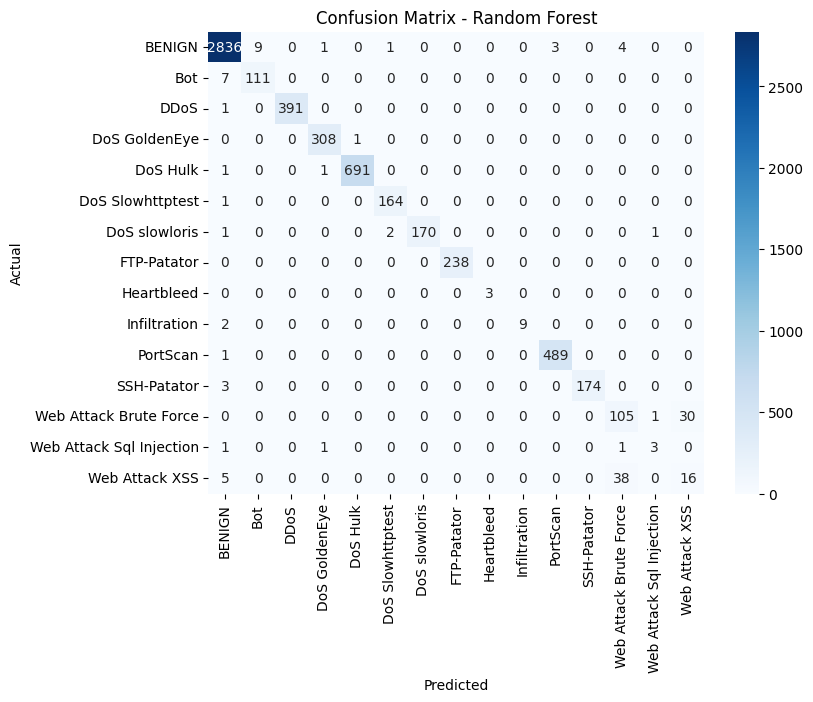

In [143]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

XGBoost

In [144]:
xgb = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')

In [145]:
# Train and evaluate XGBoost
start_time = time.time()
xgb.fit(X_train, y_train)
training_time_xgb = time.time() - start_time

C:\Users\nazib\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [07:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [146]:
y_pred_xgb = xgb.predict(X_test)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

In [147]:
print("\nXGBoost:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")
print(f"Training Time (s): {training_time_xgb:.2f}")


XGBoost:
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Training Time (s): 1.37


In [148]:
# Evaluate
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

XGBoost Results:
Accuracy: 0.9836909871244636
Classification Report:
                           precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00      2854
                     Bot       0.96      0.95      0.95       118
                    DDoS       1.00      1.00      1.00       392
           DoS GoldenEye       0.99      1.00      1.00       309
                DoS Hulk       1.00      1.00      1.00       693
        DoS Slowhttptest       0.99      0.98      0.98       165
           DoS slowloris       0.98      0.98      0.98       174
             FTP-Patator       1.00      1.00      1.00       238
              Heartbleed       1.00      1.00      1.00         3
            Infiltration       1.00      0.82      0.90        11
                PortScan       0.99      1.00      1.00       490
             SSH-Patator       1.00      1.00      1.00       177
  Web Attack Brute Force       0.74      0.79      0.76       136
Web A

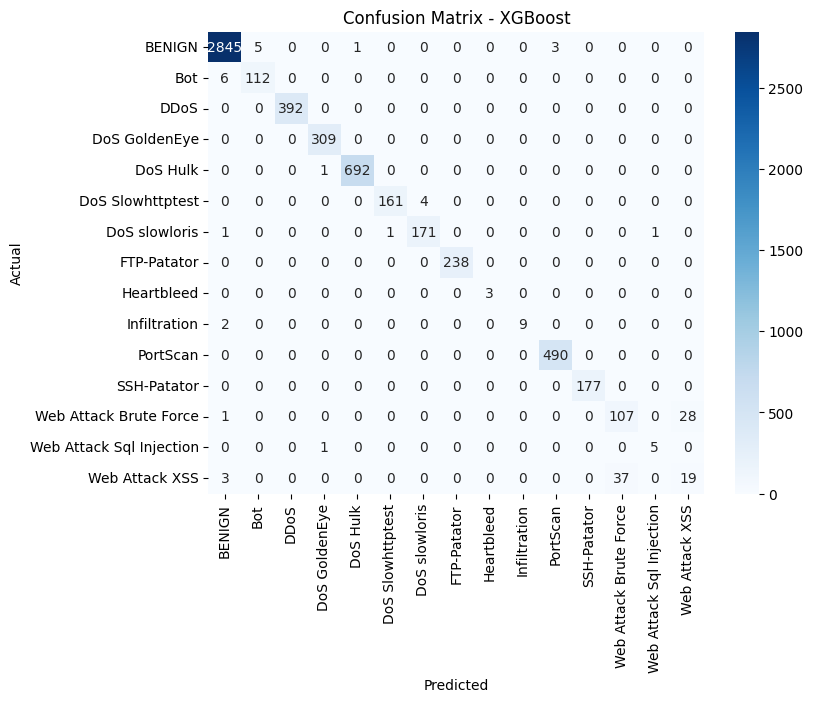

In [149]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [150]:
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)

In [151]:
start_time = time.time()
svm_model.fit(X_train, y_train)

training_time_svm = time.time() - start_time

In [152]:
# Predict
y_pred_svm = svm_model.predict(X_test)

In [153]:
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [154]:
# Evaluate
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

SVM Results:
Accuracy: 0.8573390557939914
Classification Report:
                           precision    recall  f1-score   support

                  BENIGN       1.00      0.77      0.87      2854
                     Bot       0.36      0.98      0.53       118
                    DDoS       0.78      0.99      0.88       392
           DoS GoldenEye       0.92      0.95      0.94       309
                DoS Hulk       0.94      0.99      0.96       693
        DoS Slowhttptest       0.93      0.99      0.96       165
           DoS slowloris       0.92      0.95      0.93       174
             FTP-Patator       0.91      1.00      0.95       238
              Heartbleed       1.00      1.00      1.00         3
            Infiltration       0.53      0.73      0.62        11
                PortScan       0.80      1.00      0.89       490
             SSH-Patator       0.73      0.97      0.83       177
  Web Attack Brute Force       1.00      0.04      0.07       136
Web Attac

In [155]:
print("\nSVM:")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print(f"Training Time (s): {training_time_svm:.2f}")


SVM:
Precision: 0.92
Recall: 0.86
F1-Score: 0.86
Training Time (s): 25.03


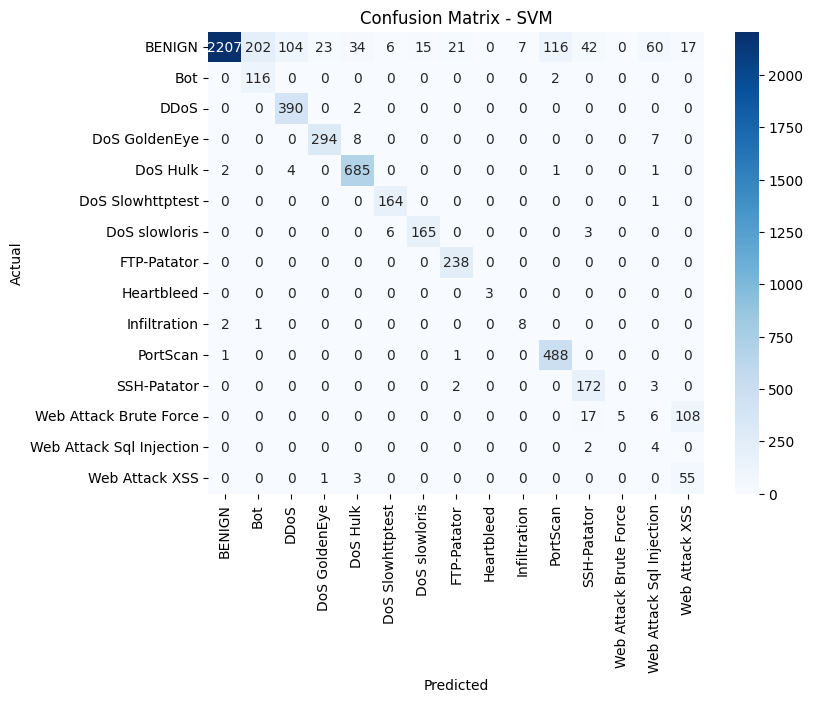

In [156]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [157]:
from sklearn.manifold import TSNE

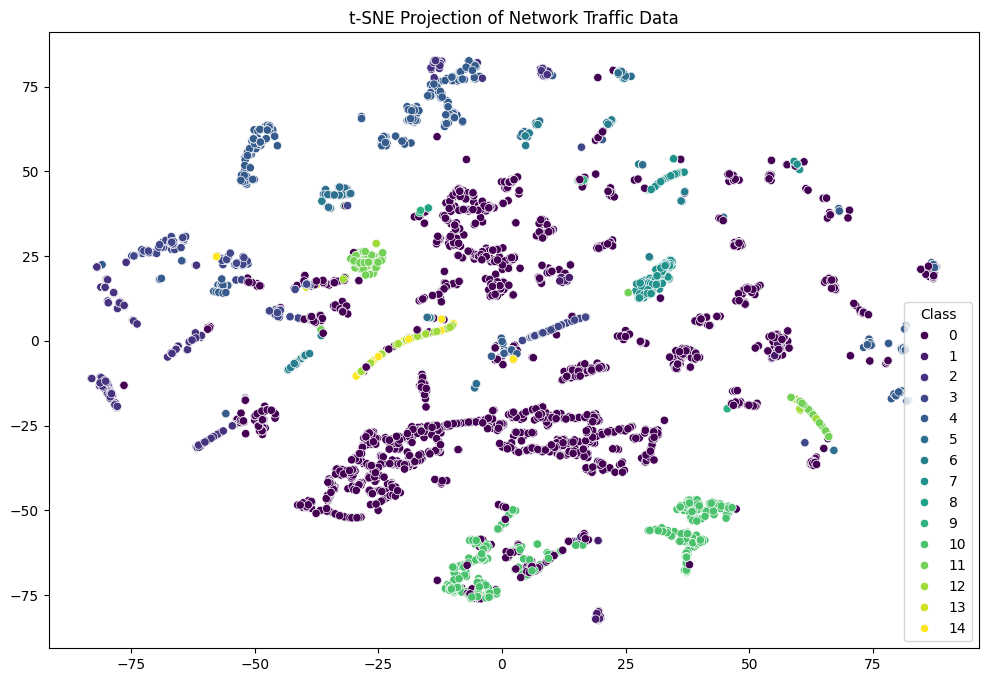

In [161]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

# Plot t-SNE projection
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('t-SNE Projection of Network Traffic Data')
plt.legend(title='Class')
plt.show()